In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
BASE_DIR=('/content/drive/MyDrive/Main_folder/')
train_dir=os.path.join(BASE_DIR,'train/')
val_dir=os.path.join(BASE_DIR,'val/')
test_dir=os.path.join(BASE_DIR,'test/')

print('Number of images in training set = ',str(len(glob(train_dir+'*/*'))))
print('Number of images in validation set = ',str(len(glob(val_dir+'*/*'))))
print('Number of images in testing set = ',str(len(glob(test_dir+'*/*'))))

Number of images in training set =  18668
Number of images in validation set =  16
Number of images in testing set =  626


In [ ]:
training_images = tf.io.gfile.glob('/content/drive/MyDrive/Main_folder/train/*/*')
validation_images = tf.io.gfile.glob('/content/drive/MyDrive/Main_folder/val/*/*')


total_files = training_images
total_files.extend(validation_images)
print(f'Total number of images : training_images + validation_images = {len(total_files)}\n')

#spliting 80:20
train_images, val_images = train_test_split(total_files, test_size = 0.2)
print(f'After division of 80:20')
print(f'Total number of training images = {len(train_images)}')
print(f'Total number of validation images = {len(val_images)}')

Total number of images : training_images + validation_images = 18684

After division of 80:20
Total number of training images = 14947
Total number of validation images = 3737


In [ ]:
tf.io.gfile.makedirs('/New Xrays/working/val_dataset/NORMAL/')
tf.io.gfile.makedirs('/New Xrays/working/val_dataset/PNEUMONIA/')
tf.io.gfile.makedirs('/New Xrays/working/train_dataset/NORMAL/')
tf.io.gfile.makedirs('/New Xrays/working/train_dataset/PNEUMONIA/')

In [ ]:
import os

for ele in train_images:
    parts_of_path = ele.split('/')
    dest_path = '/New Xrays/working/train_dataset/PNEUMONIA/' if 'PNEUMONIA' == parts_of_path[-2] else '/New Xrays/working/train_dataset/NORMAL/'
    dest_path += parts_of_path[-1]

    # Check if the file exists at the destination
    if not tf.io.gfile.exists(dest_path):
        tf.io.gfile.copy(src=ele, dst=dest_path)
    else:
        print(f"File already exists at {dest_path}. Skipping.")

In [ ]:
for ele in val_images:
    parts_of_path = ele.split('/')
    destination = ''

    if 'PNEUMONIA' == parts_of_path[-2]:
        destination = '/New Xrays/working/val_dataset/PNEUMONIA/' +  parts_of_path[-1]
    else:
        destination = '/New Xrays/working/val_dataset/NORMAL/' +  parts_of_path[-1]

    # Check if the file already exists
    if tf.io.gfile.exists(destination):
        print(f"File '{destination}' already exists. Skipping.")
    else:
        tf.io.gfile.copy(src=ele, dst=destination)


In [ ]:
print('Pneumonia x-ray images in training set after split = ',len(os.listdir('/New Xrays/working/train_dataset/PNEUMONIA/')))
print('Normal x-ray images in training set after split = ',len(os.listdir('/New Xrays/working/train_dataset/NORMAL/')))
print('Pneumonia x-ray images in validation set after split = ',len(os.listdir('/New Xrays/working/val_dataset/PNEUMONIA/')))
print('Normal x-ray images in validation set after split = ',len(os.listdir('/New Xrays/working/val_dataset/NORMAL/')))
print('Pneumonia x-ray images in test set = ',len(os.listdir('/content/drive/MyDrive/Main_folder/test/PNEUMONIA')))
print('Normal x-ray images in test set = ',len(os.listdir('/content/drive/MyDrive/Main_folder/test/NORMAL')))


Pneumonia x-ray images in training set after split =  9955
Normal x-ray images in training set after split =  4992
Pneumonia x-ray images in validation set after split =  2525
Normal x-ray images in validation set after split =  1212
Pneumonia x-ray images in test set =  392
Normal x-ray images in test set =  234


In [ ]:
train_dir='/New Xrays/working/train_dataset/'
val_dir='/New Xrays/working/val_dataset/'
test_dir='/content/drive/MyDrive/Main_folder/test/'

train_normal_dir='/New Xrays/working/train_dataset/NORMAL'
train_pneumonia_dir='/New Xrays/working/train_dataset/PNEUMONIA'
val_normal_dir='/New Xrays/working/val_dataset/NORMAL'
val_pneumonia_dir='/New Xrays/working/val_dataset/PNEUMONIA'

In [ ]:
train_normal_fnames=os.listdir(train_normal_dir)
train_pneumonia_fnames=os.listdir(train_pneumonia_dir)

print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])

['aug_0_958.jpeg', 'aug_0_1208.jpeg', 'NORMAL2-IM-0600-0001.jpeg', 'aug_0_9926.jpeg', 'aug_0_6315.jpeg', 'aug_0_8772.jpeg', 'aug_0_8176.jpeg', 'aug_0_2414.jpeg', 'aug_0_3004.jpeg', 'aug_0_6250.jpeg']
['person1954_bacteria_4886.jpeg', 'aug_0_958.jpeg', 'aug_0_1208.jpeg', 'aug_0_8009.jpeg', 'aug_0_2657.jpeg', 'aug_0_8128.jpeg', 'person267_bacteria_1251.jpeg', 'aug_0_3802.jpeg', 'aug_0_5391.jpeg', 'person1488_virus_2592.jpeg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

no_cols=4
no_rows=4

pic_index=0

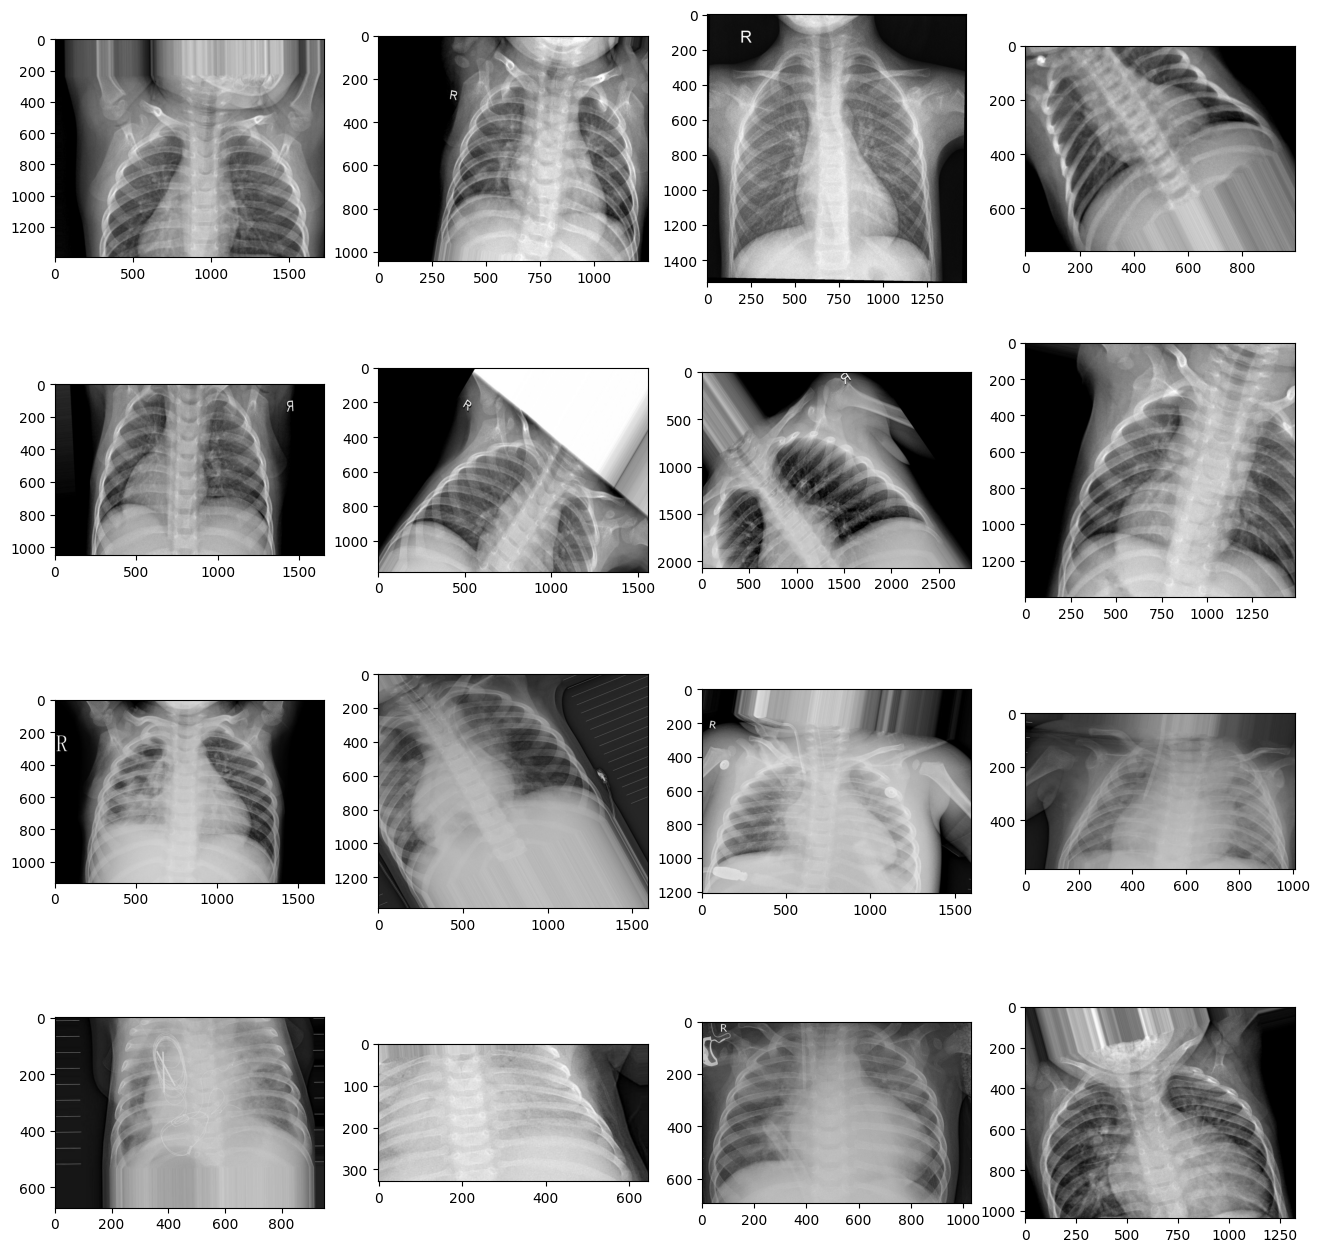

In [ ]:
fig=plt.gcf()
fig.set_size_inches(no_cols*4,no_rows*4)

pic_index+=8

normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
pneumonia_pix=[os.path.join(train_pneumonia_dir,fname) for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(normal_pix+pneumonia_pix):
    sp=plt.subplot(no_rows,no_cols,i+1)
    sp.axis()

    img=mpimg.imread(img_path)
    plt.imshow(img,cmap='gray')

plt.show()

# first 8 images are normal x-ray images and next 8 images are pnemonia x-ray images

**CNN**

In [ ]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

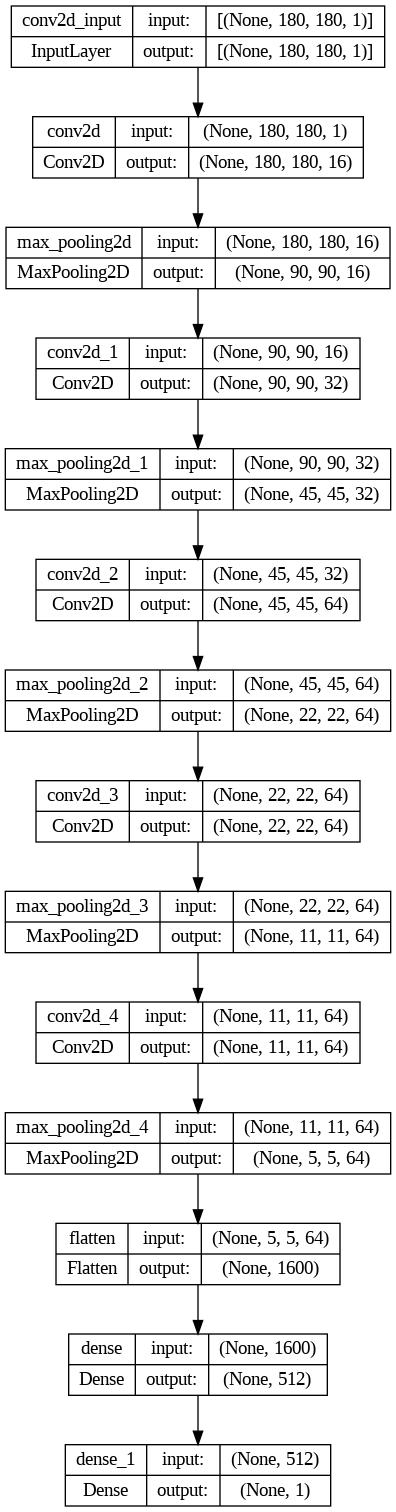

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.jpg', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

Found 14947 images belonging to 2 classes.
Found 3737 images belonging to 2 classes.
Found 626 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,validation_data=val_generator,epochs=20,verbose=2)

Epoch 1/20
117/117 - 761s - loss: 0.5586 - accuracy: 0.7163 - precision: 0.7359 - recall: 0.8943 - val_loss: 0.5222 - val_accuracy: 0.7685 - val_precision: 0.7731 - val_recall: 0.9335 - 761s/epoch - 7s/step
Epoch 2/20
117/117 - 748s - loss: 0.4529 - accuracy: 0.7872 - precision: 0.8497 - recall: 0.8261 - val_loss: 0.3864 - val_accuracy: 0.8381 - val_precision: 0.8723 - val_recall: 0.8926 - 748s/epoch - 6s/step
Epoch 3/20
117/117 - 755s - loss: 0.4061 - accuracy: 0.8117 - precision: 0.8691 - recall: 0.8438 - val_loss: 0.3237 - val_accuracy: 0.8737 - val_precision: 0.9316 - val_recall: 0.8788 - 755s/epoch - 6s/step
Epoch 4/20
117/117 - 770s - loss: 0.3503 - accuracy: 0.8419 - precision: 0.8879 - recall: 0.8724 - val_loss: 0.2897 - val_accuracy: 0.8975 - val_precision: 0.9515 - val_recall: 0.8949 - 770s/epoch - 7s/step
Epoch 5/20
117/117 - 749s - loss: 0.3206 - accuracy: 0.8624 - precision: 0.9024 - recall: 0.8892 - val_loss: 0.2557 - val_accuracy: 0.8943 - val_precision: 0.9702 - val_rec

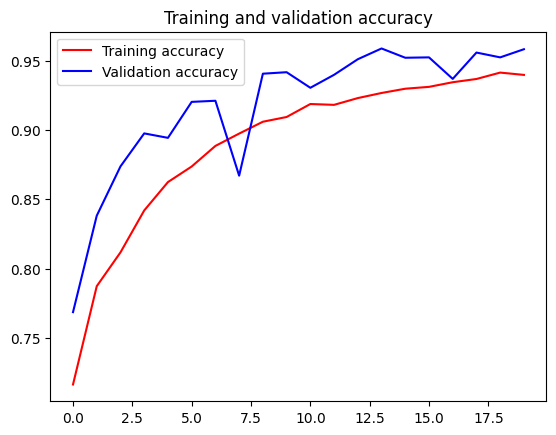

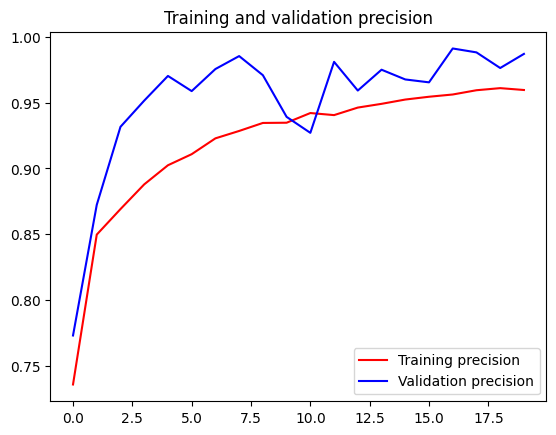

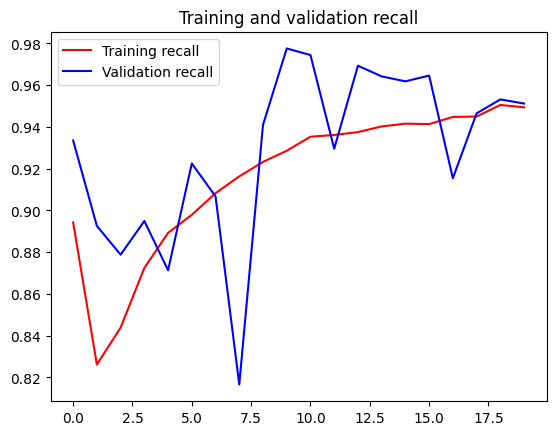

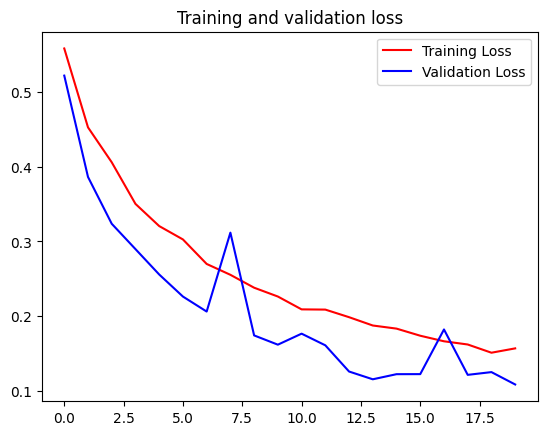

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_precision=history.history['precision']
val_precision=history.history['val_precision']

train_recall=history.history['recall']
val_recall=history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

plt.plot(epochs, train_recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
eval_result1 = model.evaluate_generator(test_generator, 624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])


<ipython-input-23-46bd9660b648>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result1 = model.evaluate_generator(test_generator, 624)


loss  : 0.27412912249565125
accuracy  : 0.9169328808784485
Precision : 0.9028435945510864
Recall : 0.9719387888908386


In [ ]:
model.save('/content/drive/MyDrive/New Model/NewModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Testing**

In [ ]:
from tensorflow import keras

model_path = "/content/drive/MyDrive/New Model/NewModel.h5"
model = keras.models.load_model(model_path)

from PIL import Image
import numpy as np

# Load the image
image_path = "/content/drive/MyDrive/Main_folder/test/PNEUMONIA/person100_bacteria_479.jpeg"
image = Image.open(image_path)

# Resize the image to match your model's input size (adjust 'width' and 'height')
width, height = model.input_shape[1], model.input_shape[2]
image = image.resize((width, height))

# Convert the image to a numpy array and normalize it
image = np.array(image) / 255.0

predictions = model.predict(np.expand_dims(image, axis=0))

if predictions[0] < 0.5:
    result = "No Pneumonia"
else:
    result = "Pneumonia Detected"
print(result)



1/1 [==============================] - 0s 120ms/step
Pneumonia Detected


In [ ]:
from tensorflow import keras
from PIL import Image
import numpy as np

# Load the model
model_path = "/content/drive/MyDrive/New Model/NewModel.h5"
model = keras.models.load_model(model_path)

# Load the image
image_path = "/content/drive/MyDrive/20230217_074827.jpg"
image = Image.open(image_path)

# Resize the image to match your model's input size (adjust 'width' and 'height')
width, height = model.input_shape[1], model.input_shape[2]
image = image.resize((width, height))

# Convert the image to a numpy array and normalize it
image_array = np.array(image) / 255.0

# Check if the image is RGB (color)
if len(image_array.shape) == 3 and image_array.shape[2] == 3:
    print("The provided image is in RGB color format. It is not an X-ray image.")
else:
    # Predict using the model
    predictions = model.predict(np.expand_dims(image_array, axis=0))

    # Threshold for classifying as pneumonia
    threshold = 0.5
    if predictions[0] < threshold:
        result = "No Pneumonia"
    else:
        result = "Pneumonia Detected"
    print("Prediction:", result)


The provided image is in RGB color format. It is not an X-ray image.


**Converting .h5 to .tflite**

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/New Model/NewModel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("NewModel.tflite", "wb").write(tflite_model)

3674956